<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Visualizing and tuning CARTs


---

Using the admissions data from earlier in the course, build CARTs, look at how they work visually, and compare their performance to other models.

### 1. Install and load the packages required to visually show decision tree branching

You will need to first:

1. Install `graphviz` with homebrew (on OSX). The command will be `brew install graphviz`
- Install `pydotplus` with `conda install -c anaconda pydotplus`
- Load the packages as shown below (you may need to restart the kernel after the installations.)

In [1]:
# REQUIREMENTS:
# conda install -c anaconda pydotplus
# brew install graphviz

### 2. Load in admissions data and other python packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
admit = pd.read_csv('../../../../resource-datasets/admissions/admissions.csv')

### 3. Create regression and classification X, y data

The regression data will be:

    Xr = [admit, gre, prestige]
    yr = gpa
    
The classification data will be:

    Xc = [gre, gpa, prestige]
    yc = admit

In [11]:
admit.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [13]:
# A:
admit.dropna(inplace=True)

Xr = admit[['admit','gre','prestige']]
yr = admit['gpa']

Xc = admit[['gre','gpa','prestige']]
yc = admit['admit']

### 4. Cross-validate linear regression and logistic regression on the data

Fit a linear regression for the regression problem and a logistic regression for the classification problem. Cross-validate the R2 and accuracy scores.

In [30]:
# A:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

# Regressor
regressor = DecisionTreeRegressor(criterion='mse', max_depth=3, random_state=1)
regressor.fit(Xr, yr)
print('Regression cross val score:',cross_val_score(regressor,Xr,yr,cv=5).mean())

# Classifier
classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=1)
classifier.fit(Xc, yc)
print('Classification cross val score:',cross_val_score(classifier,Xc,yc,cv=5).mean())

Regression cross val score: 0.13718465878156308
Classification cross val score: 0.6196518987341771


### 5. Building regression trees

With `DecisionTreeRegressor`:

1. Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the R2 scores of each of the models and compare to the linear regression earlier.

In [31]:
# A:
regressor1 = DecisionTreeRegressor(criterion='mse', max_depth=1, random_state=1)
regressor1.fit(Xr, yr)
print('Regression cross val score:',cross_val_score(regressor1,Xr,yr,cv=5).mean())
regressor2 = DecisionTreeRegressor(criterion='mse', max_depth=2, random_state=1)
regressor2.fit(Xr, yr)
print('Regression cross val score:',cross_val_score(regressor2,Xr,yr,cv=5).mean())
regressor3 = DecisionTreeRegressor(criterion='mse', max_depth=3, random_state=1)
regressor3.fit(Xr, yr)
print('Regression cross val score:',cross_val_score(regressor3,Xr,yr,cv=5).mean())
regressorNone = DecisionTreeRegressor(criterion='mse', max_depth=None, random_state=1)
regressorNone.fit(Xr, yr)
print('Regression cross val score:',cross_val_score(regressorNone,Xr,yr,cv=5).mean())

Regression cross val score: 0.10503166699459252
Regression cross val score: 0.13157509609737456
Regression cross val score: 0.13718465878156308
Regression cross val score: -0.2947915815947818


### 6. Visualizing the regression tree decisions

Use the template code below to create charts that show the logic/branching of your four decision tree regressions from above.

#### Interpreting a regression tree diagram

- First line is the condition used to split that node (go left if true, go right if false)
- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- `value` is the mean response value in that node

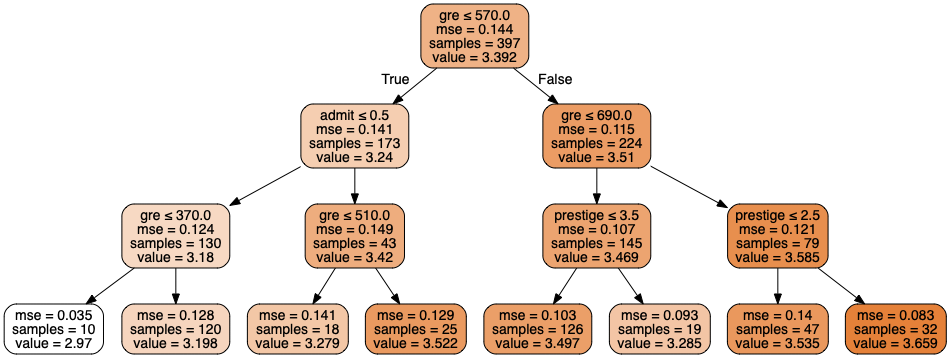

In [108]:
# # TEMPLATE CODE
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(regressor3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 7. Building classification trees

With `DecisionTreeClassifier`:

1. Again build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.

Note that now you'll be using the classification task where we are predicting `admit`.

In [33]:
# A:
classifier1 = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=1)
classifier1.fit(Xc, yc)
print('Classification cross val score:',cross_val_score(classifier1,Xc,yc,cv=5).mean())
classifier2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
classifier2.fit(Xc, yc)
print('Classification cross val score:',cross_val_score(classifier2,Xc,yc,cv=5).mean())
classifier3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
classifier3.fit(Xc, yc)
print('Classification cross val score:',cross_val_score(classifier3,Xc,yc,cv=5).mean())
classifierNone = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=1)
classifierNone.fit(Xc, yc)
print('Classification cross val score:',cross_val_score(classifierNone,Xc,yc,cv=5).mean())

Classification cross val score: 0.6750316455696203
Classification cross val score: 0.7075632911392405
Classification cross val score: 0.7152215189873417
Classification cross val score: 0.6196518987341771


### 8. Visualize the classification trees

The plotting code will be the same as for regression, you just need to change the model you're using for each plot and the feature names.

The output changes somewhat from the regression tree chart. Earlier it would give the MSE of that node, but now there is a line called `value` that tells you the count of each class at that node.

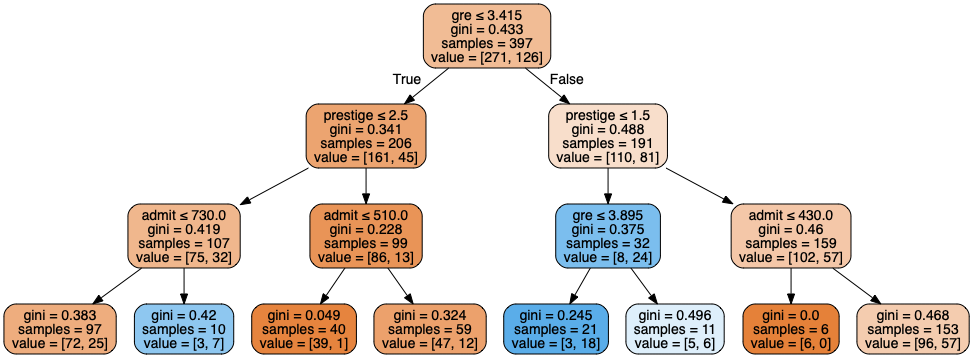

In [35]:
# A:
# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(classifier3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 9. Using GridSearchCV to find the best decision tree classifier

As decision trees that are unrestricted will just end up overfitting the training data, decision tree regression and classification models in sklearn offer a variety of ways to "pre-prune" (by restricting how many times the tree can branch and what it can use).

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cutoff to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per tree?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?
ccp_alpha         | Associate a cost with the number of terminal nodes

It is not always best to search over _all_ of these in a grid search, unless you have a small dataset. Many of them while not redundant are going to have very similar effects on your model's fit.

Check out the documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#### Do the grid search for the regression and classification decision tree

In [109]:
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor(criterion='mse',random_state=1)

regressor_params = {'max_depth':list(range(10))+[None],
                    'min_samples_split':list(range(10)),
                   'ccp_alpha':[0,0.001,0.01]}

gs = GridSearchCV(regressor, regressor_params, n_jobs=2, cv=5, verbose=1)
gs.fit(Xr,yr)

gs_best_regressor = gs.best_estimator_
print('Best params:',gs.best_params_)
print('Best CVScore:',gs_best_regressor.score(Xr,yr))

Fitting 5 folds for each of 330 candidates, totalling 1650 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best params: {'ccp_alpha': 0, 'max_depth': 3, 'min_samples_split': 2}
Best CVScore: 0.20627954975895146


[Parallel(n_jobs=2)]: Done 1650 out of 1650 | elapsed:    7.0s finished


In [92]:
pd.DataFrame(dict(feature=Xr.columns, importance=gs_best_regressor.feature_importances_))

,feature,importance
0,admit,0.157717
1,gre,0.754581
2,prestige,0.087702


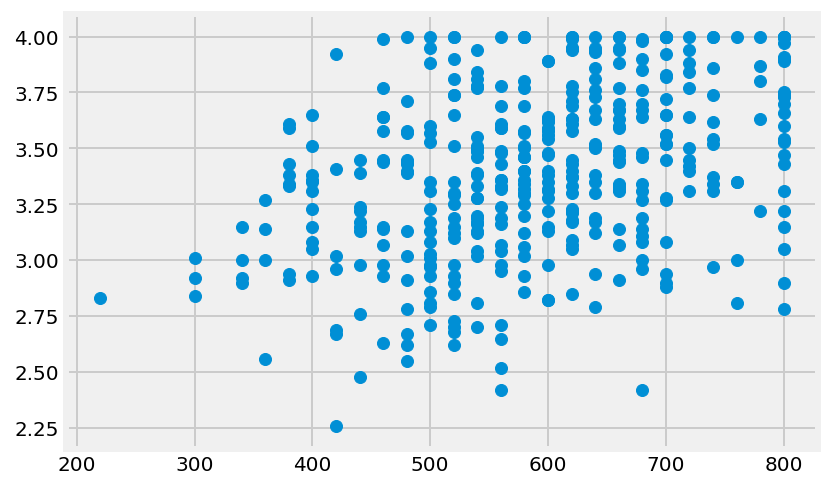

In [96]:
plt.scatter(x=admit.gre, y=admit.gpa)

In [97]:
admit.groupby('gpa').mean()

,admit,gre,prestige
gpa,,,
2.26,0.000000,420.000000,4.000000
2.42,0.500000,620.000000,1.500000
2.48,0.000000,440.000000,4.000000
2.52,0.000000,560.000000,2.000000
2.55,0.000000,480.000000,1.000000
2.56,0.000000,360.000000,3.000000
2.62,0.500000,500.000000,2.000000
2.63,0.000000,460.000000,2.000000
2.65,1.000000,560.000000,3.000000


In [52]:
classifier = DecisionTreeClassifier(criterion='gini',random_state=1)

classifier_params = {'max_depth':list(range(10)),'min_samples_split':list(range(10))}

gs = GridSearchCV(classifier, classifier_params, n_jobs=2, cv=5, verbose=1)
gs.fit(Xc,yc)

gs_best_classifier = gs.best_estimator_
print('Best params:',gs.best_params_)
print('Best CVScore:',gs_best_classifier.score(Xc,yc))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best params: {'max_depth': 3, 'min_samples_split': 2}
Best CVScore: 0.7329974811083123


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    2.0s finished


In [99]:
pd.DataFrame(dict(feature=Xc.columns, importance=gs_best_classifier.feature_importances_))

,feature,importance
0,gre,0.242311
1,gpa,0.355654
2,prestige,0.402035


## Switch over to the college stats dataset

We are going to be predicting whether or not a college is public or private. Set up your X, y variables accordingly.

In [53]:
col = pd.read_csv('../../../../resource-datasets/college_stats/College.csv')

In [60]:
# A:
col.Private.value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [61]:
col.loc[:,'Apps':'Grad.Rate'].shape

(777, 17)

In [112]:
X = col.loc[:,'Apps':'Grad.Rate']
y = col['Private']

classifier = DecisionTreeClassifier()
classifier_params = {'max_depth':list(range(10)),
                     'min_samples_split':list(range(10)),
                     'max_features':list(range(5)),
                    'ccp_alpha':np.linspace(0,0.1,10)}

gs = GridSearchCV(classifier, classifier_params, n_jobs=2, verbose=1, cv=5)
gs.fit(X,y)
print('Best params:', gs.best_params_)
print('Cross Val Score:', gs.best_score_)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 1539 tasks      | elapsed:    7.2s
[Parallel(n_jobs=2)]: Done 12339 tasks      | elapsed:   40.5s


Best params: {'ccp_alpha': 0.0, 'max_depth': 8, 'max_features': 4, 'min_samples_split': 8}
Cross Val Score: 0.9189495450785774


[Parallel(n_jobs=2)]: Done 25000 out of 25000 | elapsed:  1.3min finished


### 10. Set up and run the gridsearch on the data

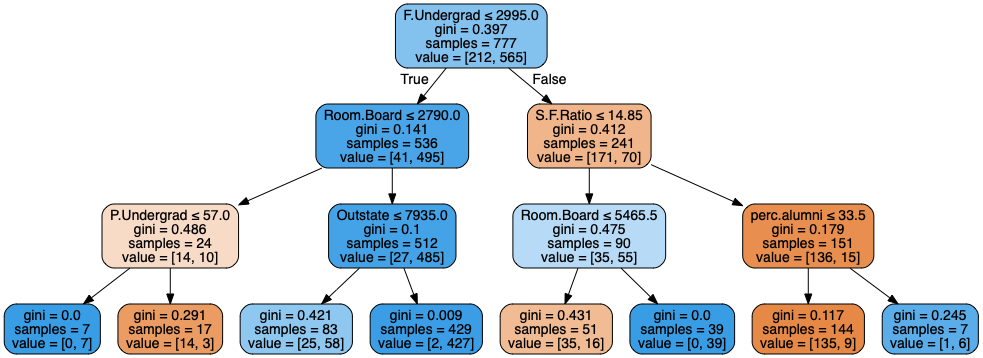

In [80]:
# A:
# initialize the output file object
dot_data = StringIO() 

# for feature_names i put the columns of my Xr matrix
export_graphviz(best_gs.fit(X,y), out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 11. Print out the "feature importances"

The model has an attribute called `.feature_importances_` which will rank the features according to their importance. The ranking is based on an importance measure ranging from 0 to 1, with 1 being the most important. The importance scores of all features add up to 1.

The score takes into account how many times the feature was used to make a decision, how many data points were involved in each decision and how much the decision increased the purity of the node. A feature with higher feature importance reduced the criterion (impurity) more than the other features.

Below, show the feature importances for each variable predicting private versus not, sorted by most important feature to least.

In [98]:
# A:
pd.DataFrame(dict(feature=X.columns,
                  feature_importance=best_gs.feature_importances_)).sort_values('feature_importance', ascending=False)

,feature,feature_importance
5,F.Undergrad,0.595129
8,Room.Board,0.150627
13,S.F.Ratio,0.131926
7,Outstate,0.054628
14,perc.alumni,0.037653
6,P.Undergrad,0.030038
10,Personal,0.000000
15,Expend,0.000000
12,Terminal,0.000000
11,PhD,0.000000
